In [1]:
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torch.nn as nn
from torch.nn import Linear, MSELoss, functional as F
from torch.optim import SGD, Adam, RMSprop
from torch.autograd import Variable
import numpy as np
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
class Rosenbrock(nn.Module):
    def __init__(self, a=0, b=0):
        super().__init__()
        self.function = lambda x,y:(a - x)**2 + b*(y - x**2)**2
    def forward(self, x, y):
        return self.function(x, y)
    

In [3]:
class TwoMin(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return x**2 + np.exp(-1 /(100*(x - 1))**2) - 1

In [4]:
def run_optimizer(x,y, loss_fn, num_step=1000):
    x_list, y_list, value_list = [], [], []
    for i in range(num_step):
        value = loss_fn(x, y)
        x_list.append(x.item())
        y_list.append(y.item())
        value_list.append( value.item())
        
        optimizer.zero_grad()
        value.backward()
        optimizer.step()

        
    return x_list, y_list, value_list

In [5]:
r = 2
num_traj = 2
all_outputs = []
num_step = 100
rosen_fn = Rosenbrock(a=1, b=10)
for i in range(num_traj):
    x = torch.FloatTensor(1).uniform_(-r, r)
    y = torch.FloatTensor(1).uniform_(-r, r)
    x.requires_grad = True
    y.requires_grad = True
    optimizer = Adam(params = [x,y], lr=0.1)
    all_outputs.append( run_optimizer(x, y, rosen_fn, num_step))

<class 'matplotlib.contour.QuadContourSet'>


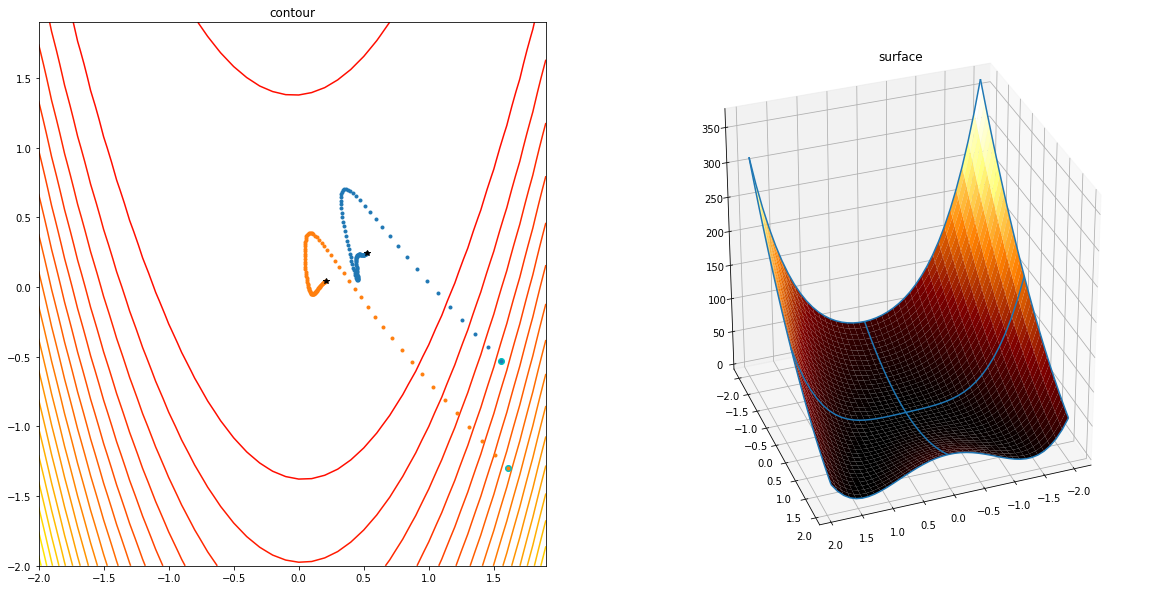

In [6]:
r = 2
X, Y = np.meshgrid(np.arange(-r,r,.1), np.arange(-r,r,.1))
Z = rosen_fn(X, Y)
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.set_title('contour')
contour = ax1.contour(X, Y, Z, levels=20, cmap=plt.cm.autumn)
print(type(contour))  # <class 'matplotlib.contour.QuadContourSet'>
# plt.plot(x_list, y_list, "xr", label="Estimated parameters")

for i in range(num_traj):
    plt.plot(all_outputs[i][0][0], all_outputs[i][1][0], "oc")
    plt.plot(all_outputs[i][0], all_outputs[i][1], ".")
    plt.plot(all_outputs[i][0][-1], all_outputs[i][1][-1], "*k")
#     plt.plot(x_list2, y_list2, ".-b")
    
#     plt.plot(x_list2[0], y_list2[0], "*k")

ax2 = fig.add_subplot(122, projection='3d')

ax2.set_title('surface')
ax2.plot_surface(X, Y, Z, cmap=cm.afmhot)
ax2.plot_wireframe(X, Y, Z, rstride=20, cstride=20)

ax2.view_init(30, 70)
plt.draw()


plt.show()